# Multinomial Naive Bayes Classifier with MinMaxScaler

This Code template is for Classification tasks using MultinomialNB based on the Naive Bayes algorithm for multinomially distributed data and feature rescaling technique MinMaxScaler in a pipeline.

## Required Packages

In [ ]:
!pip install imblearn

In [2]:
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as se 
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

## Initialization


Filepath of CSV file



In [3]:
#filepath
file_path= ""

List of features which are required for model training .



In [4]:
#x_values
features=[]

Target feature for prediction.

In [5]:
#y_value
target=''

## Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.


In [7]:
df=pd.read_csv(file_path)
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Feature Selection

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [148]:
X = df[features]
Y = df[target]

## Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.

In [149]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [153]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i]) 
Y=NullClearner(Y)
Y=EncodeY(Y)
X=EncodeX(X)
X.head()

,On-board service,Flight Distance,Age,Online support,Cleanliness,Checkin service,Ease of Online booking,Baggage handling,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Class_Business,Class_Eco,Class_Eco Plus,Customer Type_Loyal Customer,Customer Type_disloyal Customer
0,3,265,65,2,3,5,3,3,0,0.0,1,0,0,1,0,1,0
1,4,2464,47,2,3,2,3,4,310,305.0,0,1,1,0,0,1,0
2,3,2138,15,2,4,4,2,4,0,0.0,1,0,0,1,0,1,0
3,1,623,60,3,1,4,1,1,0,0.0,1,0,0,1,0,1,0
4,2,354,70,4,2,4,2,2,0,0.0,1,0,0,1,0,1,0


## Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

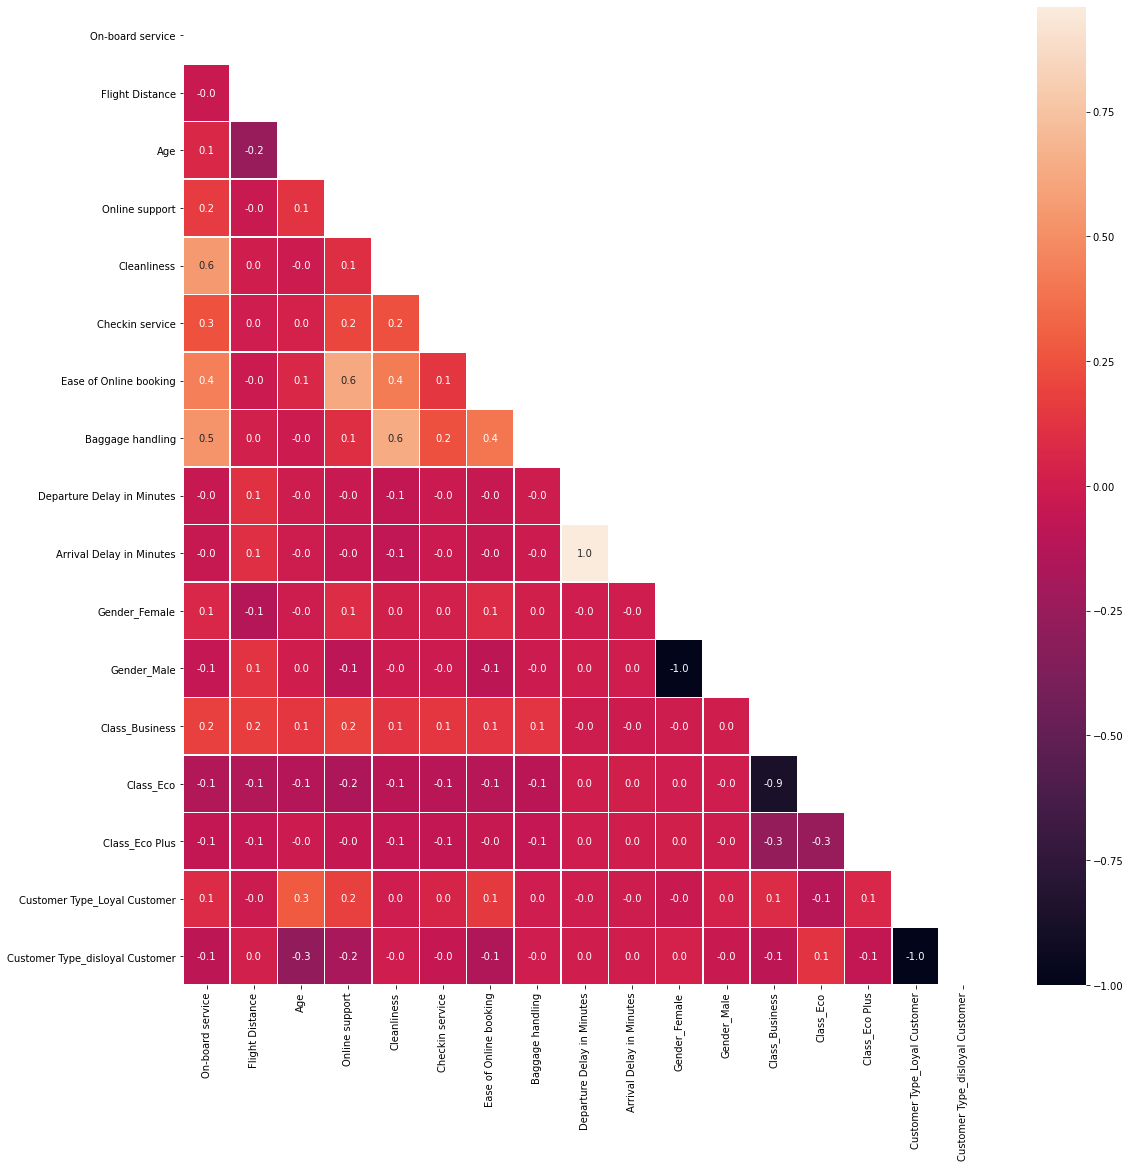

In [154]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

## Distribution Of Target Variable

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

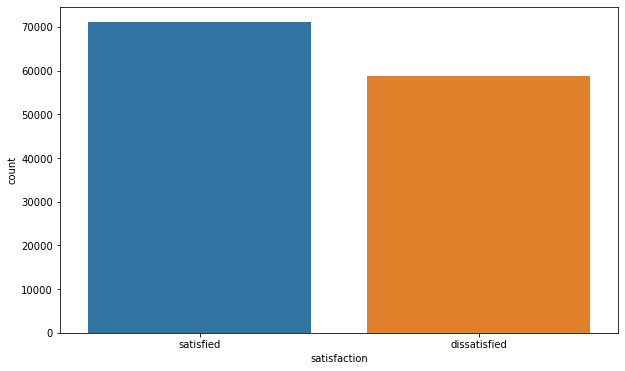

In [155]:
plt.figure(figsize = (10,6))
se.countplot(Y)

## Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.



In [156]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [157]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

## Model
With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial probability that an event occurs.

The multinomial Naive Bayes classifier is suitable for classification with discrete features. The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

Model Tuning Parameters
1. alpha : float, default=1.0
Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

2. fit_prior : bool, default=True
Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

3. class_prior : array-like of shape (n_classes,), default=None
Prior probabilities of the classes. If specified the priors are not adjusted according to the data.

#### MinMax Scaler:

MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.



In [158]:
model = make_pipeline(MinMaxScaler(),MultinomialNB())
 
model.fit(x_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('multinomialnb', MultinomialNB())])

## Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [159]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 77.09 %



## Confusion Matrix
A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

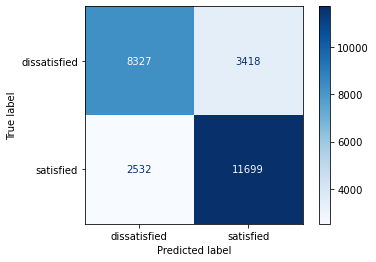

In [160]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

## Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:-  percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

In [161]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

dissatisfied       0.77      0.71      0.74     11745
   satisfied       0.77      0.82      0.80     14231

    accuracy                           0.77     25976
   macro avg       0.77      0.77      0.77     25976
weighted avg       0.77      0.77      0.77     25976



#### Creator: Neel Pawar, Github: [Profile]( https://github.com/neel-ntp)